<a href="https://colab.research.google.com/github/WisnuMaul0112/latihan_mechine_learning/blob/master/Rock_paper_scissor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

submission Wisnu Maulana

In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

In [ ]:
!wget --no-check-certificate \
https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
-O /tmp/rockpaperscissors.zip

--2020-10-12 14:03:59--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  8.60MB/s    in 42s     

2020-10-12 14:04:43 (7.33 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [ ]:
import zipfile,os
folder_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(folder_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/rockpaperscissors'
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir, 'val')

os.mkdir(train_dir)
os.mkdir(validation_dir)
os.listdir('/tmp/rockpaperscissors')
os.listdir('/tmp/rockpaperscissors/val')



[]

In [ ]:
rock_dir = os.path.join(base_dir,'rock')
paper_dir = os.path.join(base_dir, 'paper')
scissors_dir = os.path.join(base_dir, 'scissors')

In [ ]:
train_rock_dir, val_rock_dir = train_test_split(os.listdir(rock_dir), test_size = 0.4)
train_paper_dir, val_paper_dir = train_test_split(os.listdir(paper_dir), test_size = 0.4)
train_scissors_dir, val_scissors_dir = train_test_split(os.listdir(scissors_dir), test_size = 0.4)



In [ ]:
train_rock = os.path.join(train_dir, 'rock')
train_paper = os.path.join(train_dir, 'paper')
train_scissors = os.path.join(train_dir, 'scissors')
val_rock = os.path.join(validation_dir, 'rock')
val_paper = os.path.join(validation_dir, 'paper')
val_scissors = os.path.join(validation_dir, 'scissors')

if not os.path.exists(train_rock):
  os.mkdir(train_rock)
if not os.path.exists(train_paper):
  os.mkdir(train_paper)
if not os.path.exists(train_scissors):
  os.mkdir(train_scissors)

if not os.path.exists(val_rock):
  os.mkdir(val_rock)
if not os.path.exists(val_paper):
  os.mkdir(val_paper)
if not os.path.exists(val_scissors):
  os.mkdir(val_scissors)

In [ ]:
import shutil

for i in train_rock_dir:
  shutil.copy(os.path.join(rock_dir, i), os.path.join(train_rock, i))
for i in train_paper_dir:
  shutil.copy(os.path.join(paper_dir,i), os.path.join(train_paper,i))
for i in train_scissors_dir:
  shutil.copy(os.path.join(scissors_dir,i), os.path.join(train_scissors,i))

for i in val_rock_dir:
  shutil.copy(os.path.join(rock_dir, i), os.path.join(val_rock,i))
for i in val_paper_dir:
  shutil.copy(os.path.join(paper_dir,i), os.path.join(val_paper,i))
for i in val_scissors_dir:
  shutil.copy(os.path.join(scissors_dir,i), os.path.join(val_scissors,i))


In [ ]:
train_datagen = ImageDataGenerator(
    rescale = 1./225,
    rotation_range = 20,
    horizontal_flip = True,
    vertical_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest')

test_datagen = ImageDataGenerator(
    rescale = 1./225,
    rotation_range = 20,
    horizontal_flip = True,
    vertical_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest')

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size =(150,150),
    batch_size = 32,
    class_mode = 'categorical'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = (150,150),
    batch_size = 32,
    class_mode = 'categorical'
)

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [ ]:
 model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape= (150,150,3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(128,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(256,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation= 'relu'),
  tf.keras.layers.Dense(3, activation= 'softmax')
])

In [ ]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = tf.optimizers.Adam(),
              metrics=['accuracy'])

In [ ]:
model.fit(
    train_generator,
    steps_per_epoch = 25,
    epochs = 20,
    validation_data = validation_generator,
    validation_steps = 5,
    verbose =2
)

Epoch 1/20
25/25 - 44s - loss: 0.0945 - accuracy: 0.9700 - val_loss: 0.1313 - val_accuracy: 0.9812
Epoch 2/20
25/25 - 43s - loss: 0.0518 - accuracy: 0.9837 - val_loss: 0.0431 - val_accuracy: 0.9812
Epoch 3/20
25/25 - 43s - loss: 0.0595 - accuracy: 0.9850 - val_loss: 0.0161 - val_accuracy: 0.9937
Epoch 4/20
25/25 - 44s - loss: 0.0330 - accuracy: 0.9887 - val_loss: 0.0960 - val_accuracy: 0.9875
Epoch 5/20
25/25 - 44s - loss: 0.0314 - accuracy: 0.9925 - val_loss: 0.0976 - val_accuracy: 0.9937
Epoch 6/20
25/25 - 43s - loss: 0.0483 - accuracy: 0.9850 - val_loss: 0.0487 - val_accuracy: 0.9812
Epoch 7/20
25/25 - 43s - loss: 0.0200 - accuracy: 0.9925 - val_loss: 0.0164 - val_accuracy: 0.9937
Epoch 8/20
25/25 - 43s - loss: 0.0211 - accuracy: 0.9937 - val_loss: 0.0143 - val_accuracy: 0.9937
Epoch 9/20
25/25 - 43s - loss: 0.0387 - accuracy: 0.9850 - val_loss: 0.0368 - val_accuracy: 0.9875
Epoch 10/20
25/25 - 47s - loss: 0.0485 - accuracy: 0.9812 - val_loss: 0.0539 - val_accuracy: 0.9812
Epoch 11/

Saving kertas.jpeg to kertas (1).jpeg
kertas.jpeg
[[3.07221022e-02 1.02433444e-10 9.69277918e-01]]
2
ini adalah pola gunting


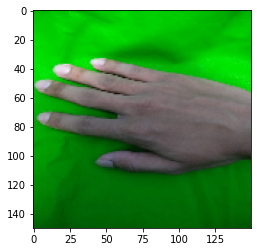

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

upload_image = files.upload()

for a in upload_image.keys():
  path = a
  img = image.load_img(path, target_size=(150,150))
  img_plot = plt.imshow(img)

  b = image.img_to_array(img)
  b = np.expand_dims(b, axis = 0)
  b = b/255

  gambar = np.vstack([b])
  classes = model.predict(gambar, batch_size= 10)
  total = np.argmax(classes)
  
  print(a)
  print(classes)
  print(total)

  if x == 2:
    print('ini adalah pola gunting')
  elif x == 1:
    print('ini adalah pola batu')
  elif x == 0:
    print('ini adalah pola kertas')
  
  hasil(total)
